## Experimenting the data

In [3]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random

In [4]:
dataset_dir = Path(r"C:\Users\nadha\OneDrive\Documents\CNN\Dataset\Jute_Pest_Dataset")
train_dir = dataset_dir / "train"
val_dir = dataset_dir / "val"
test_dir = dataset_dir / "test"


##### List all classes and count how many images are in each split

In [5]:
def count_images_in_folder(folder):
    class_counts = {}
    for cls in os.listdir(folder):
        class_path = folder / cls
        if class_path.is_dir():
            class_counts[cls] = len(list(class_path.glob("*.jpg"))) + len(list(class_path.glob("*.png")))
    return class_counts

print("Train set:", count_images_in_folder(train_dir))
print("Validation set:", count_images_in_folder(val_dir))
print("Test set:", count_images_in_folder(test_dir))


Train set: {'Beet Armyworm': 199, 'Black Hairy': 309, 'Cutworm': 399, 'Field Cricket': 392, 'Jute Aphid': 530, 'Jute Hairy': 414, 'Jute Red Mite': 457, 'Jute Semilooper': 372, 'Jute Stem Girdler': 281, 'Jute Stem Weevil': 676, 'Leaf Beetle': 297, 'Mealybug': 466, 'Pod Borer': 384, 'Scopula Emissaria': 320, 'Termite': 291, 'Termite odontotermes (Rambur)': 301, 'Yellow Mite': 342}
Validation set: {'Beet Armyworm': 40, 'Black Hairy': 30, 'Cutworm': 18, 'Field Cricket': 14, 'Jute Aphid': 27, 'Jute Hairy': 8, 'Jute Red Mite': 49, 'Jute Semilooper': 3, 'Jute Stem Girdler': 6, 'Jute Stem Weevil': 71, 'Leaf Beetle': 6, 'Mealybug': 35, 'Pod Borer': 3, 'Scopula Emissaria': 5, 'Termite': 26, 'Termite odontotermes (Rambur)': 36, 'Yellow Mite': 30}
Test set: {'Beet Armyworm': 20, 'Black Hairy': 20, 'Cutworm': 20, 'Field Cricket': 20, 'Jute Aphid': 22, 'Jute Hairy': 20, 'Jute Red Mite': 24, 'Jute Semilooper': 21, 'Jute Stem Girdler': 24, 'Jute Stem Weevil': 24, 'Leaf Beetle': 24, 'Mealybug': 24, 'Po

#### Class Distribution Plot

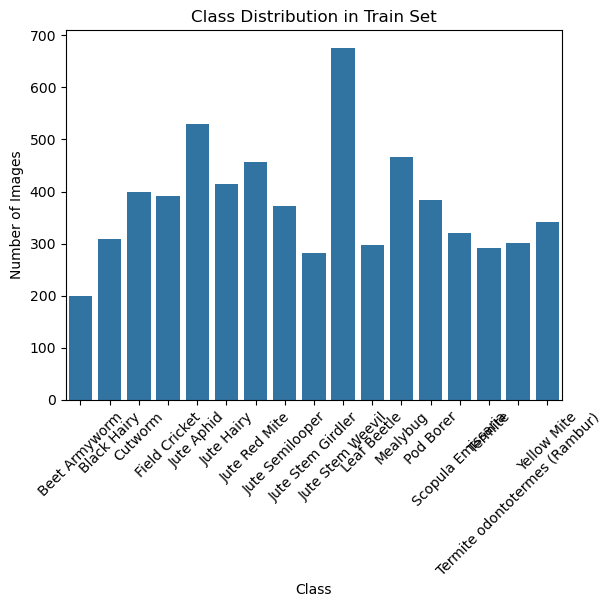

In [9]:
import seaborn as sns
import pandas as pd

train_counts = count_images_in_folder(train_dir)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Class Distribution in Train Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


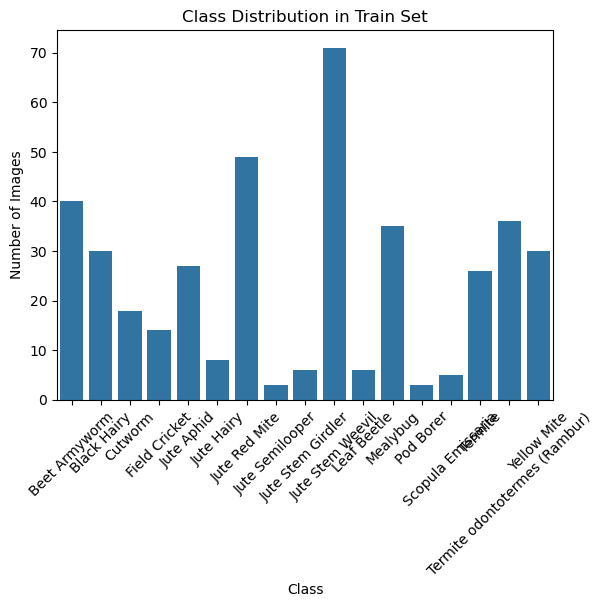

In [16]:
import seaborn as sns
import pandas as pd

train_counts = count_images_in_folder(val_dir)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Class Distribution in Train Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


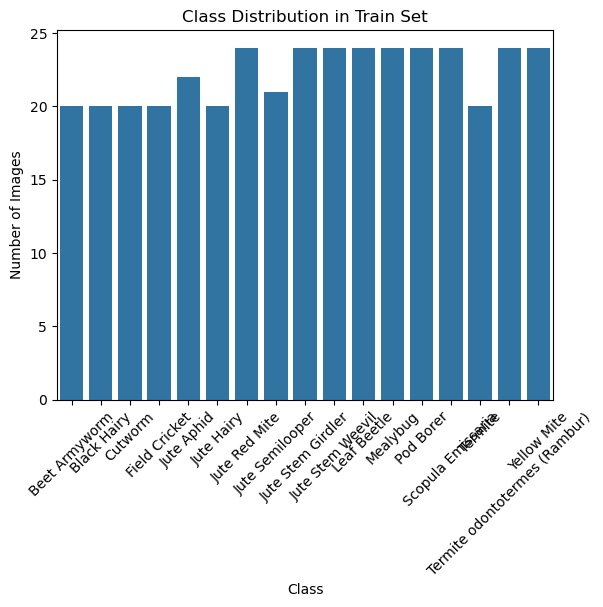

In [17]:
import seaborn as sns
import pandas as pd

train_counts = count_images_in_folder(test_dir)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Class Distribution in Train Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


#### Visualize Some Images

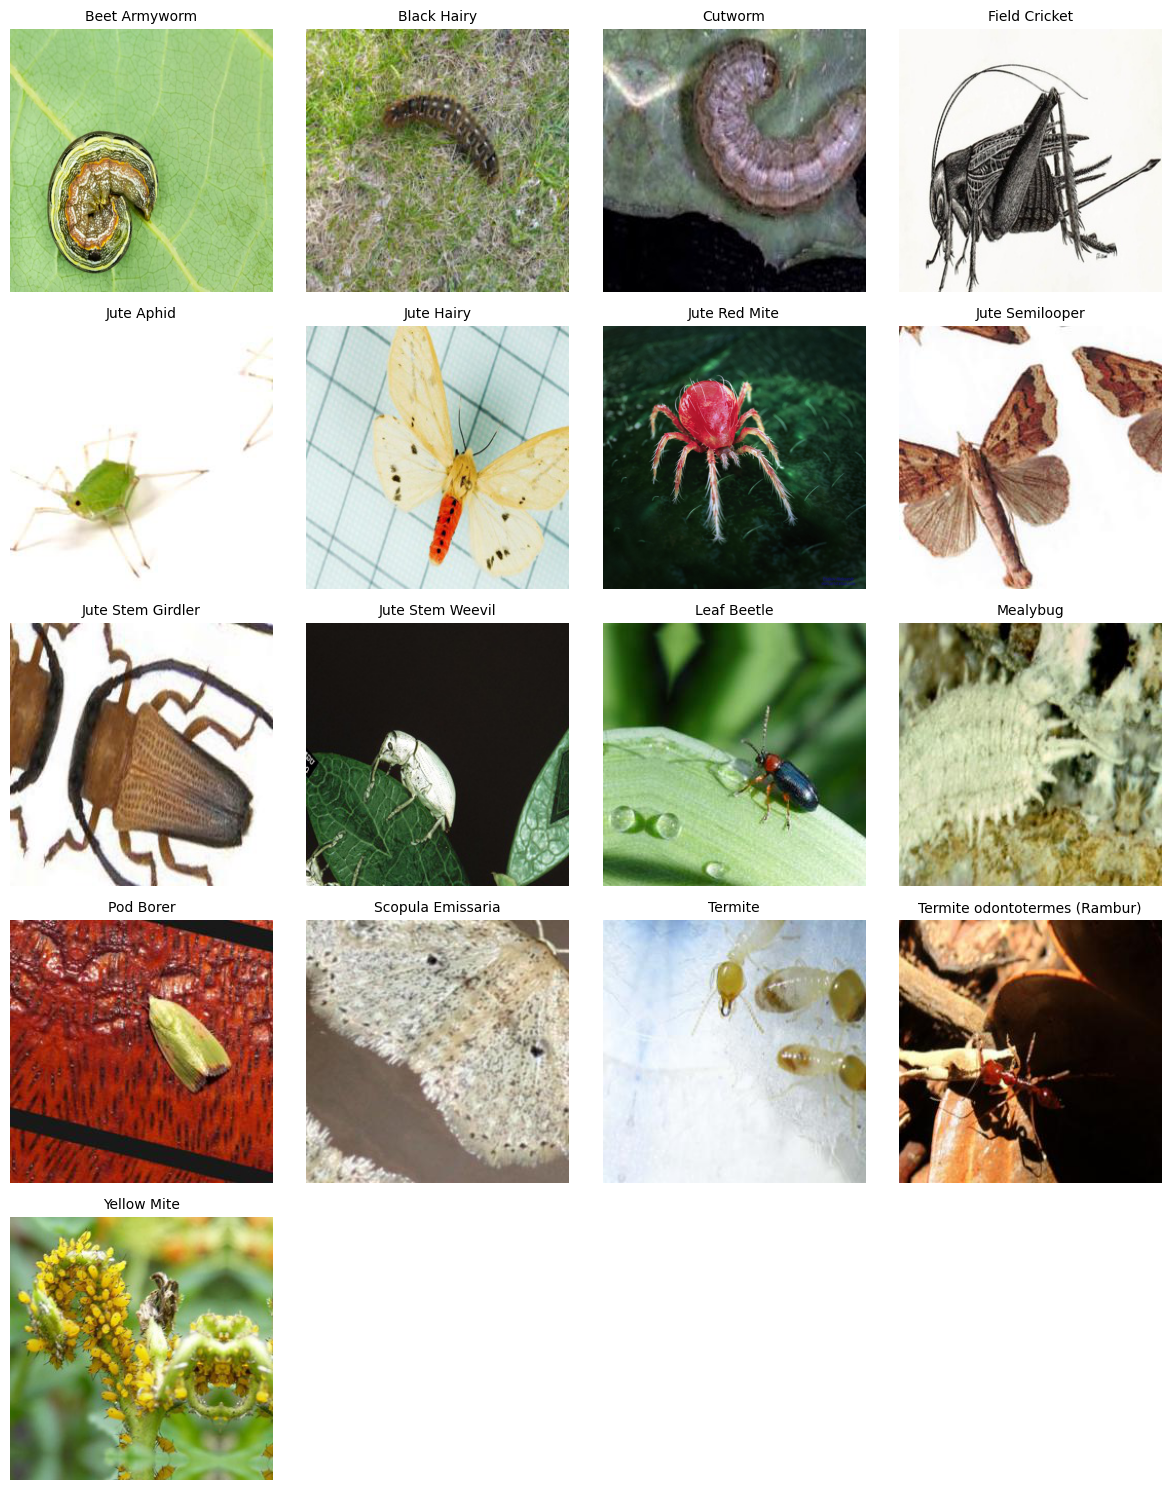

In [12]:
def show_one_per_class(folder, cols=4):
    import math
    classes = sorted(os.listdir(folder))
    images = []
    
    # Pick one random image per class
    for cls in classes:
        class_path = folder / cls
        class_images = list(class_path.glob("*"))
        if class_images:
            images.append(random.choice(class_images))
    
    # Calculate rows
    rows = math.ceil(len(images) / cols)
    plt.figure(figsize=(cols * 3, rows * 3))
    
    # Plot images
    for i, img_path in enumerate(images):
        img = Image.open(img_path)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(img_path.parent.name, fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function on your train folder
show_one_per_class(train_dir, cols=4)


In [14]:
# Example: check for corrupt images
for cls in os.listdir(train_dir):
    for img_path in (train_dir / cls).glob("*"):
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            print(f"Corrupt image: {img_path}")


##### Image sizes and channel

In [15]:
sizes = []
channels = []
for cls in os.listdir(train_dir):
    for img_path in (train_dir / cls).glob("*"):
        img = Image.open(img_path)
        sizes.append(img.size)
        channels.append(len(img.getbands()))

from collections import Counter
print("Most common sizes:", Counter(sizes).most_common(5))
print("Channel distribution:", Counter(channels))


Most common sizes: [((256, 256), 5416), ((640, 640), 782), ((416, 416), 63), ((300, 300), 32), ((500, 333), 6)]
Channel distribution: Counter({3: 6444})


#### Dataset Statistics

Check average color, mean/std of images (useful for normalization in training)

In [18]:
import numpy as np

means, stds = [], []
for cls in os.listdir(train_dir):
    for img_path in (train_dir / cls).glob("*"):
        img = np.array(Image.open(img_path)) / 255.0
        means.append(img.mean(axis=(0,1)))
        stds.append(img.std(axis=(0,1)))

mean = np.mean(means, axis=0)
std = np.mean(stds, axis=0)
print("Mean:", mean, "Std:", std)


Mean: [0.5545844  0.55010869 0.42718867] Std: [0.18650843 0.19204223 0.19561999]
